In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import folium
from folium import plugins
low_memory=False

In [2]:
paths = ['./dados/roubo-jan.csv','./dados/roubo-fev.csv','./dados/roubo-mar.csv']


In [3]:
def populaDf(paths):
    dfs = []
    for path in paths:
        df = pd.DataFrame(pd.read_csv(path, encoding='ISO-8859-1'))
        dfs.append(df)
        df = pd.concat(dfs)
    return df

In [4]:
df = populaDf(paths)

df.reset_index()
#df.columns
df.drop_duplicates()

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,BAIRRO,BO_EMITIDO,BO_INICIADO,CIDADE,DATAELABORACAO,DATAOCORRENCIA,DESCRICAOLOCAL,LATITUDE,LOGRADOURO,LONGITUDE,NUMERO,PERIDOOCORRENCIA,UF,Unnamed: 11
0,PARQUE NOVO HORIZONTE,NaN,31/2019,S.JOSE DOS CAMPOS,02/01/2019 22:53:25,02/01/2019,-45,-23,RUA DOS FERREIROS,1979849307733,59,A NOITE,SP,NaN
14,CENTRO,NaN,10/2019,S.JOSE DOS CAMPOS,03/01/2019 09:35:54,29/12/2018,-45,-23,VIADUTO RAQUEL MARCONDES,1870878989999,0,A NOITE,SP,NaN
15,JARDIM ESTORIL,NaN,21/2019,S.JOSE DOS CAMPOS,03/01/2019 12:48:17,02/01/2019,-45,-23,RUA ELMANO FERREIRA VELOSO,2499805773048,200,A NOITE,SP,NaN
16,JARDIM DAS INDï¿½STRIAS,NaN,5397/2019,S.JOSE DOS CAMPOS,03/01/2019 14:31:38,31/12/2018,-45,-23,AVENIDA DOUTOR JOAO BATISTA SOARES DE QU,223766967,0,A TARDE,SP,NaN
17,JARDIM IMPERIAL,NaN,17/2019,S.JOSE DOS CAMPOS,03/01/2019 16:15:07,30/12/2018,-45,-23,RUA DOM JOAO VI,275946974,1,A NOITE,SP,NaN
18,URBANOVA,NaN,34/2019,S.JOSE DOS CAMPOS,04/01/2019 07:15:52,04/01/2019,-45,-23,AVENIDA JORGE ZARRUR,2028281237091,100,DE MADRUGADA,SP,NaN
19,CONJUNTO HABITACIONAL DOM PEDRO II,NaN,24/2019,S.JOSE DOS CAMPOS,04/01/2019 10:53:16,04/01/2019,-45,-23,RUA PADRE WILSON CUNHA,273769994,799,EM HORA INCERTA,SP,NaN
20,JARDIM VALPARAï¿½BA,NaN,22/2019,S.JOSE DOS CAMPOS,04/01/2019 14:44:40,28/12/2018,-45,-23,AVENIDA PRESIDENTE JUSCELINO KUBITSCHEK,177390359,7838,A NOITE,SP,NaN
21,NaN,NaN,56/2019,S.JOSE DOS CAMPOS,04/01/2019 15:39:49,31/12/2018,Residï¿½ncia,-23,NaN,2472448,0,PELA MANHA,SP,NaN
22,VILA IRACEMA,NaN,12648/2019,S.JOSE DOS CAMPOS,05/01/2019 00:02:32,01/01/2019,-45,-23,RUA GOVERNADOR VALADARES,1748299,40,A NOITE,SP,NaN


## 10 Bairros de São José dos Campos que mais houveram roubos de celulares de jan/2019 - mar/2019

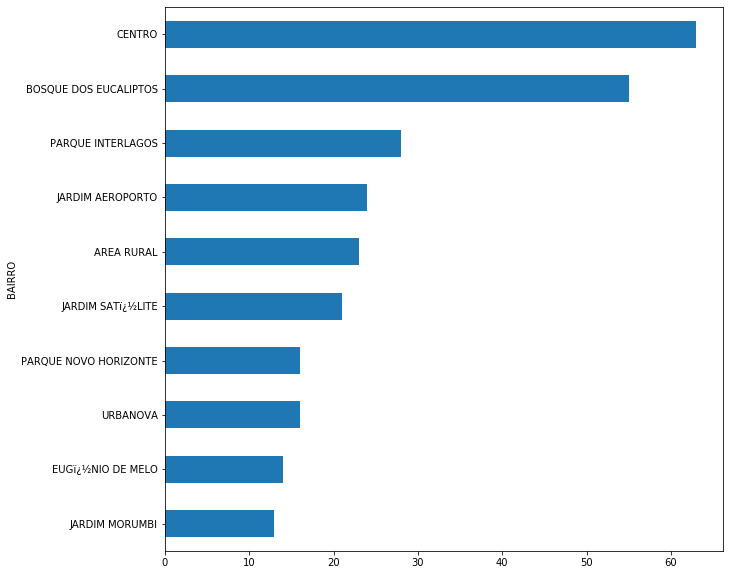

In [5]:
df.groupby('BAIRRO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

## Periodos que mais houveram roubos de celulares em São José dos Campos,  de jan/2019 - mar/2019

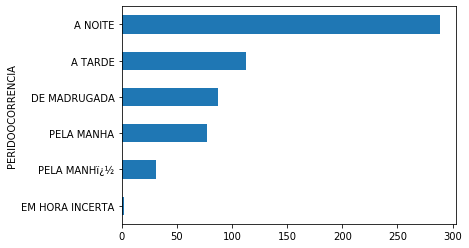

In [6]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='barh')

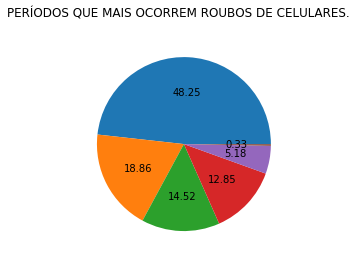

In [7]:
plt.axis('equal')
plt.pie(df['PERIDOOCORRENCIA'].value_counts(), autopct="%.2f")
plt.suptitle("PERÍODOS QUE MAIS OCORREM ROUBOS DE CELULARES.")
plt.show()

## Logradouros que mais ocorreram roubos de celulares em São José dos Campos, de jan/2019 - mar/2019

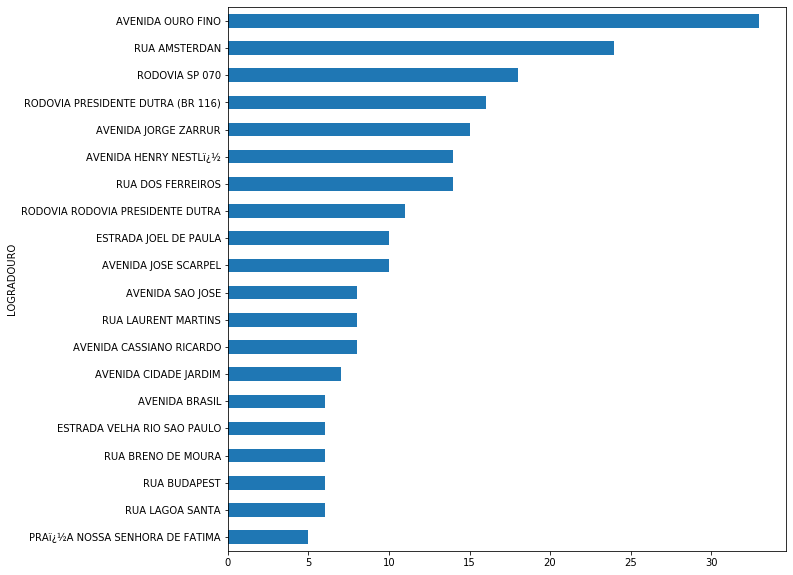

In [8]:
df.groupby('LOGRADOURO').size().sort_values().tail(20).plot(kind='barh', figsize=(10, 10))